# Introduction
### This project demonstrates data preprocessing, cleaning, and exploratory data analysis (EDA) in R. The dataset consists of music-related features including popularity, tempo, and genres.

In [49]:
## Load Libraries and Dataset
install.packages('tidyverse')
install.packages('ggplot2')
install.packages('ggcorrplot')

library(tidyverse)
library(ggplot2)
library(ggcorrplot)

df <- read.csv('spotify.csv')

#First 5 observations
head(df,5)


The downloaded binary packages are in
	/var/folders/17/y6yqqy7n54j29b_bxf1w8h880000gn/T//Rtmp8nCAzj/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/y6yqqy7n54j29b_bxf1w8h880000gn/T//Rtmp8nCAzj/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/y6yqqy7n54j29b_bxf1w8h880000gn/T//Rtmp8nCAzj/downloaded_packages


,Track.ID,Track.Name,Album.Name,Artist.Name.s.,Release.Date,Duration..ms.,Popularity,Added.By,Added.At,Genres,⋯,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time.Signature
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5Eg4TsPcqNbIjd8ADMZosg,Chains,Nick Jonas X2,Nick Jonas,2015-11-20,203106,55,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop",⋯,0,-5.884,0,0.0454,0.0153,0.00e+00,0.0757,0.120,76.003,4
2,3V3iy4K6paycRmTyrjQVwi,Secrets,Heart On My Sleeve (Deluxe),Mary Lambert,2014-10-14,223405,39,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,neo mellow,⋯,0,-5.900,1,0.0410,0.0260,1.35e-04,0.2150,0.713,93.229,4
3,2f0GI2ZLUtbGqFx8t2Gk6A,I Know Places (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,195700,63,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,pop,⋯,0,-5.348,1,0.0574,0.0846,0.00e+00,0.0710,0.626,160.015,4
4,2Od3Imc5PJeZhRPeIhpgN6,Delta 1406,31 Minutes to Takeoff,Mike Posner,2010-08-09,184546,19,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop,pop dance,pop rap",⋯,1,-7.334,1,0.0451,0.0138,4.61e-04,0.1210,0.205,87.043,4
5,5hw1uOFZK3odNqXa4sF2JZ,Stay With Me - Re-record,In The Lonely Hour (10th Anniversary Edition / Deluxe),Sam Smith,2024-08-30,172760,38,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"pop,uk pop",⋯,0,-7.121,1,0.0411,0.5550,4.08e-05,0.1030,0.246,84.837,4


# View structure and summary

In [50]:
str(df)

'data.frame':	265 obs. of  23 variables:
 $ Track.ID        : chr  "5Eg4TsPcqNbIjd8ADMZosg" "3V3iy4K6paycRmTyrjQVwi" "2f0GI2ZLUtbGqFx8t2Gk6A" "2Od3Imc5PJeZhRPeIhpgN6" ...
 $ Track.Name      : chr  "Chains" "Secrets" "I Know Places (Taylor's Version)" "Delta 1406" ...
 $ Album.Name      : chr  "Nick Jonas X2" "Heart On My Sleeve (Deluxe)" "1989 (Taylor's Version)" "31 Minutes to Takeoff" ...
 $ Artist.Name.s.  : chr  "Nick Jonas" "Mary Lambert" "Taylor Swift" "Mike Posner" ...
 $ Release.Date    : chr  "2015-11-20" "2014-10-14" "2023-10-26" "2010-08-09" ...
 $ Duration..ms.   : int  203106 223405 195700 184546 172760 226293 227360 214720 252733 216626 ...
 $ Popularity      : int  55 39 63 19 38 34 55 31 0 63 ...
 $ Added.By        : chr  "95fvnclitpzdbgd83xcozdsk2" "95fvnclitpzdbgd83xcozdsk2" "95fvnclitpzdbgd83xcozdsk2" "95fvnclitpzdbgd83xcozdsk2" ...
 $ Added.At        : chr  "2024-11-29T00:19:04Z" "2024-11-29T00:19:04Z" "2024-11-29T00:19:04Z" "2024-11-29T00:19:04Z" ...
 $ Genres     

In [51]:
glimpse(df)

Rows: 265
Columns: 23
$ Track.ID         <chr> "5Eg4TsPcqNbIjd8ADMZosg", "3V3iy4K6paycRmTyrjQVwi", "…
$ Track.Name       <chr> "Chains", "Secrets", "I Know Places (Taylor's Version…
$ Album.Name       <chr> "Nick Jonas X2", "Heart On My Sleeve (Deluxe)", "1989…
$ Artist.Name.s.   <chr> "Nick Jonas", "Mary Lambert", "Taylor Swift", "Mike P…
$ Release.Date     <chr> "2015-11-20", "2014-10-14", "2023-10-26", "2010-08-09…
$ Duration..ms.    <int> 203106, 223405, 195700, 184546, 172760, 226293, 22736…
$ Popularity       <int> 55, 39, 63, 19, 38, 34, 55, 31, 0, 63, 40, 45, 69, 23…
$ Added.By         <chr> "95fvnclitpzdbgd83xcozdsk2", "95fvnclitpzdbgd83xcozds…
$ Added.At         <chr> "2024-11-29T00:19:04Z", "2024-11-29T00:19:04Z", "2024…
$ Genres           <chr> "dance pop,pop", "neo mellow", "pop", "dance pop,pop,…
$ Record.Label     <chr> "Safehouse Records / Island Records", "Capitol Record…
$ Danceability     <dbl> 0.591, 0.789, 0.572, 0.688, 0.515, 0.481, 0.616, 0.49…
$ Energy          

In [52]:
summary(df)

   Track.ID          Track.Name         Album.Name        Artist.Name.s.    
 Length:265         Length:265         Length:265         Length:265        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Release.Date       Duration..ms.      Popularity      Added.By        
 Length:265         Min.   :127931   Min.   : 0.00   Length:265        
 Class :character   1st Qu.:195320   1st Qu.:15.00   Class :character  
 Mode  :character   Median :218040   Median :31.00   Mode  :character  
                    Mean   :219548   Mean   :31.71                     
                    3rd Qu.:238266   3rd Qu.:47.00                     
                    Max.   :4

# Check for missing values

In [53]:
# Count missing (NA) values for all columns
colSums(is.na(df))

Track.ID       Track.Name       Album.Name   Artist.Name.s. 
               0                0                0                0 
    Release.Date    Duration..ms.       Popularity         Added.By 
               0                0                0                0 
        Added.At           Genres     Record.Label     Danceability 
               0                0                0                0 
          Energy              Key         Loudness             Mode 
               0                0                0                0 
     Speechiness     Acousticness Instrumentalness         Liveness 
               0                0                0                0 
         Valence            Tempo   Time.Signature 
               0                0                0

In [54]:
# Count blank strings for all columns
colSums(df == "")

Track.ID       Track.Name       Album.Name   Artist.Name.s. 
               0                0                0                0 
    Release.Date    Duration..ms.       Popularity         Added.By 
               0                0                0                0 
        Added.At           Genres     Record.Label     Danceability 
               0               24                0                0 
          Energy              Key         Loudness             Mode 
               0                0                0                0 
     Speechiness     Acousticness Instrumentalness         Liveness 
               0                0                0                0 
         Valence            Tempo   Time.Signature 
               0                0                0

In [55]:
# Check for "NULL" or "unknown" values
colSums(df == "NULL" | df == "unknown" | df == "Unknown")

Track.ID       Track.Name       Album.Name   Artist.Name.s. 
               0                0                0                0 
    Release.Date    Duration..ms.       Popularity         Added.By 
               0                0                0                0 
        Added.At           Genres     Record.Label     Danceability 
               0                0                0                0 
          Energy              Key         Loudness             Mode 
               0                0                0                0 
     Speechiness     Acousticness Instrumentalness         Liveness 
               0                0                0                0 
         Valence            Tempo   Time.Signature 
               0                0                0

In [61]:
# Identify rows with missing, blank, or placeholder values
# Count blank strings for all columns
colSums(df == " ")

Track.ID       Track.Name       Album.Name   Artist.Name.s. 
               0                0                0                0 
    Release.Date    Duration..ms.       Popularity         Added.By 
               0                0                0                0 
        Added.At           Genres     Record.Label     Danceability 
               0                0                0                0 
          Energy              Key         Loudness             Mode 
               0                0                0                0 
     Speechiness     Acousticness Instrumentalness         Liveness 
               0                0                0                0 
         Valence            Tempo   Time.Signature 
               0                0                0

In [14]:
# Quick Summary of the Variables
summary(df)

   Track.ID          Track.Name         Album.Name        Artist.Name.s.    
 Length:265         Length:265         Length:265         Length:265        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Release.Date       Duration..ms.      Popularity      Added.By        
 Length:265         Min.   :127931   Min.   : 0.00   Length:265        
 Class :character   1st Qu.:195320   1st Qu.:15.00   Class :character  
 Mode  :character   Median :218040   Median :31.00   Mode  :character  
                    Mean   :219548   Mean   :31.71                     
                    3rd Qu.:238266   3rd Qu.:47.00                     
                    Max.   :4

# Convert Date Columns

In [62]:
# Convert date columns to appropriate format
df$Release.Date <- as.Date(df$Release.Date, format = "%Y-%m-%d")
df$Added.At <- as.POSIXct(df$Added.At, format = "%Y-%m-%dT%H:%M:%SZ")

# Exploratory Data Analysis

In [65]:
# Numerical summary
summary(select_if(df, is.numeric))

 Duration..ms.      Popularity     Danceability        Energy     
 Min.   :127931   Min.   : 0.00   Min.   :0.1740   Min.   :0.152  
 1st Qu.:195320   1st Qu.:15.00   1st Qu.:0.4420   1st Qu.:0.524  
 Median :218040   Median :31.00   Median :0.5360   Median :0.637  
 Mean   :219548   Mean   :31.71   Mean   :0.5338   Mean   :0.622  
 3rd Qu.:238266   3rd Qu.:47.00   3rd Qu.:0.6200   3rd Qu.:0.766  
 Max.   :485333   Max.   :83.00   Max.   :0.8900   Max.   :0.970  
      Key            Loudness            Mode         Speechiness     
 Min.   : 0.000   Min.   :-16.550   Min.   :0.0000   Min.   :0.02430  
 1st Qu.: 2.000   1st Qu.: -7.937   1st Qu.:0.0000   1st Qu.:0.03170  
 Median : 6.000   Median : -6.353   Median :1.0000   Median :0.03890  
 Mean   : 5.509   Mean   : -6.841   Mean   :0.6302   Mean   :0.04963  
 3rd Qu.: 8.000   3rd Qu.: -5.254   3rd Qu.:1.0000   3rd Qu.:0.05230  
 Max.   :11.000   Max.   : -1.395   Max.   :1.0000   Max.   :0.28400  
  Acousticness       Instrumentaln

# Visualize Distributions

# Visualize Distributions

### **Popularity**

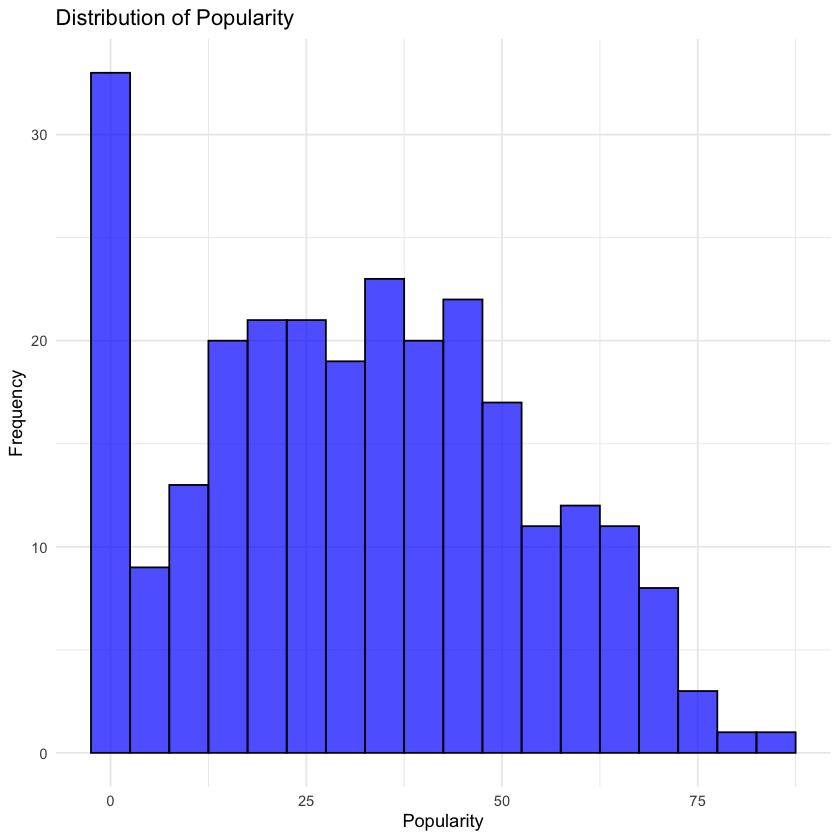

In [67]:
ggplot(df, aes(x = Popularity)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Popularity", x = "Popularity", y = "Frequency")

### **Danceability**

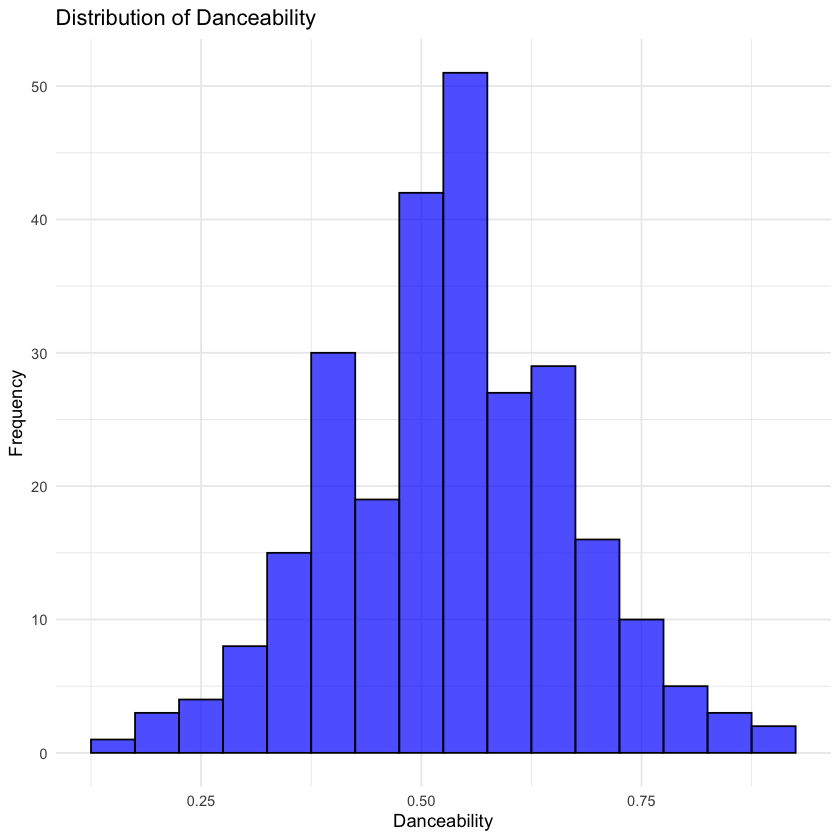

In [70]:
ggplot(df, aes(x = Danceability)) +
  geom_histogram(binwidth = 0.05, fill = "blue", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Danceability", x = "Danceability", y = "Frequency")

### **Tempo**

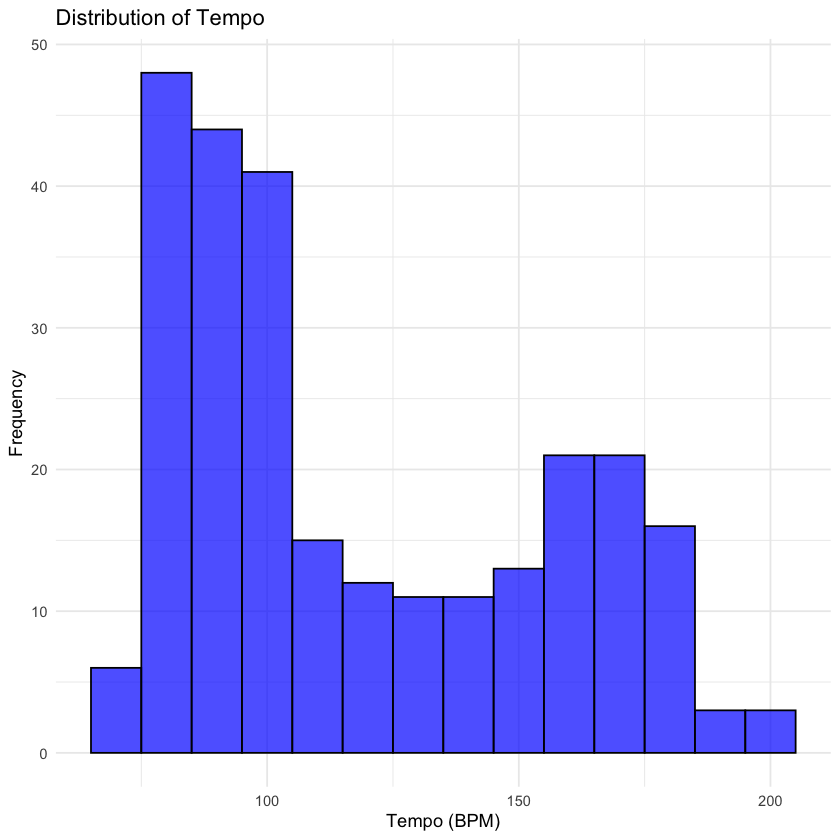

In [72]:
ggplot(df, aes(x = Tempo)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Tempo", x = "Tempo (BPM)", y = "Frequency")

# Correlation Analysis

In [73]:
# Correlation matrix for numeric features
numeric_data <- select_if(df, is.numeric)
correlation_matrix <- cor(numeric_data, use = "complete.obs")

In [74]:
# Print correlation matrix
print(correlation_matrix)

                 Duration..ms.  Popularity Danceability       Energy
Duration..ms.      1.000000000  0.08050723 -0.253882867  0.005927012
Popularity         0.080507227  1.00000000  0.040839532 -0.032268182
Danceability      -0.253882867  0.04083953  1.000000000  0.121270140
Energy             0.005927012 -0.03226818  0.121270140  1.000000000
Key                0.001259947  0.05380896 -0.089122512  0.039061708
Loudness           0.002766892  0.02444370  0.055147860  0.780575951
Mode               0.027341673  0.06677056 -0.007829257 -0.187955821
Speechiness       -0.161671330 -0.05454191  0.099708678  0.156430226
Acousticness      -0.017681929  0.08249996 -0.120688472 -0.704630902
Instrumentalness   0.122450542 -0.05032372 -0.056138897 -0.036780412
Liveness          -0.034194713 -0.08109104 -0.030774750  0.255813020
Valence           -0.197133202  0.09659480  0.433282084  0.364293439
Tempo             -0.084327725 -0.04298448 -0.238930499  0.105538418
Time.Signature    -0.051815173  0.

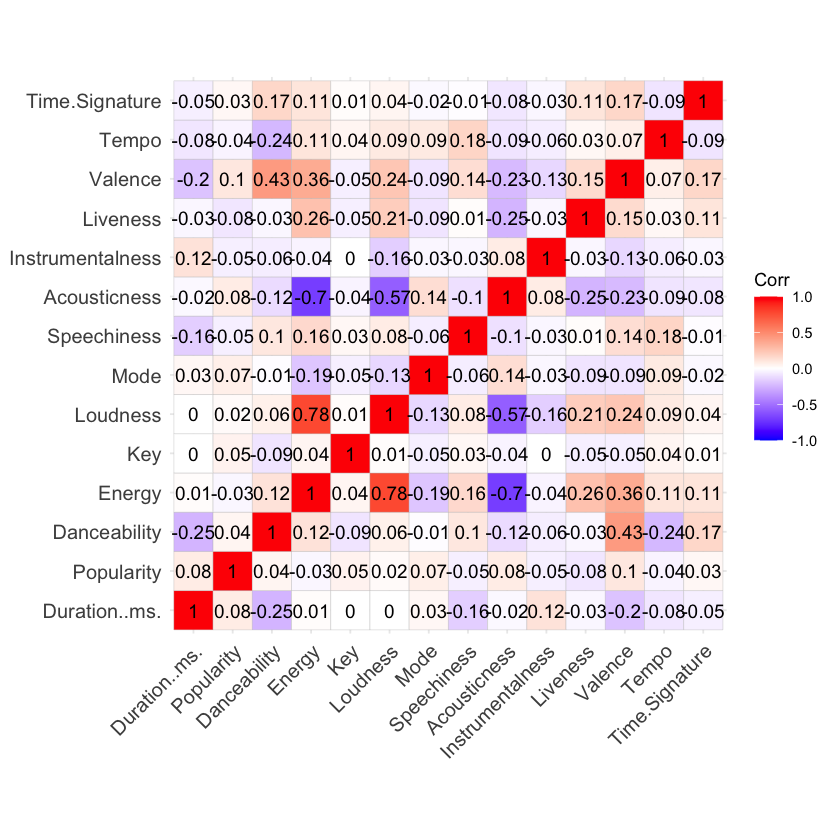

In [76]:
# Heatmap of correlations
ggcorrplot(correlation_matrix, lab = TRUE)

## Conclusion
This report showcases the preprocessing, cleaning, and exploratory analysis of the dataset. Insights include:
- Popularity distribution skews low.
- Danceability is concentrated around 0.5–0.6.
- Tempo shows peaks around common BPM ranges.
- Correlation analysis highlights relationships among features.

Further steps could involve feature engineering or advanced modeling for deeper insights.